In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!wget -O diamonds_prices2022.csv "https://drive.google.com/uc?id=1f7l-r51EO6DhMbMotrijyke6xIty0AdX"

--2023-06-22 16:18:55--  https://drive.google.com/uc?id=1f7l-r51EO6DhMbMotrijyke6xIty0AdX
Resolving drive.google.com (drive.google.com)... 74.125.20.100, 74.125.20.139, 74.125.20.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-bo-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mm6ocfdcj3uo37g14i3eq00keo2185k8/1687450725000/00767651658034008321/*/1f7l-r51EO6DhMbMotrijyke6xIty0AdX?uuid=9fca61bd-c799-4a75-bd4e-d2ff73e7de61 [following]
--2023-06-22 16:18:56--  https://doc-0c-bo-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mm6ocfdcj3uo37g14i3eq00keo2185k8/1687450725000/00767651658034008321/*/1f7l-r51EO6DhMbMotrijyke6xIty0AdX?uuid=9fca61bd-c799-4a75-bd4e-d2ff73e7de61
Resolving doc-0c-bo-docs.googleusercontent.com (doc-0c-bo-docs.googleusercontent.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to doc-0c-bo

In [ ]:
dataset_original = pd.read_csv('diamonds_prices2022.csv')

In [ ]:
dataset_original

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [ ]:
dataset_original.shape

(53943, 11)

In [ ]:
dataset_original.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
dataset_copia = dataset_original.head(25000).copy()
columns_to_drop = ['Unnamed: 0']
dataset_copia.drop(columns=columns_to_drop, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for columna in ["cut", "color", "clarity"]:
    dataset_copia[columna + "_numerica"] = le.fit_transform(dataset_copia[columna])

In [ ]:
print(dataset_copia)
print("Dimensiones del dataset_copia:", dataset_copia.shape)
print("Dimensiones del dataset_original:", dataset_original.shape)
print(dataset_copia.info())

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
24995   1.54      Ideal     G     VS2   60.2   59.0  13508  7.47  7.52  4.51   
24996   2.20      Ideal     I     SI2   62.2   56.0  13512  8.33  8.29  5.17   
24997   1.50    Premium     E     VS1   60.1   60.0  13513  7.42  7.48  4.48   
24998   1.51       Good     G     VS1   62.4   59.0  13515  7.25  7.28  4.53   
24999   1.50  Very Good     G     VS2   61.1   60.0  13528  7.40  7.30  4.49   

       cut_numerica  color_numerica  cl

In [ ]:
vu1 = dataset_copia[["cut", "cut_numerica"]].drop_duplicates()
vu2 = dataset_copia[["color", "color_numerica"]].drop_duplicates()
vu3 = dataset_copia[["clarity", "clarity_numerica"]].drop_duplicates()
vu1

,cut,cut_numerica
0,Ideal,2
1,Premium,3
2,Good,1
5,Very Good,4
8,Fair,0


In [ ]:
vu2

,color,color_numerica
0,E,1
3,I,5
4,J,6
7,H,4
12,F,2
25,G,3
28,D,0


In [ ]:
vu3

,clarity,clarity_numerica
0,SI2,3
1,SI1,2
2,VS1,4
3,VS2,5
5,VVS2,7
6,VVS1,6
15,I1,0
229,IF,1


In [ ]:
columns_to_drop = ['cut','color','clarity']
dataset_copia.drop(columns=columns_to_drop, inplace=True)

In [ ]:
dataset_copia.sample(10)

,carat,depth,table,price,x,y,z,cut_numerica,color_numerica,clarity_numerica
18899,1.03,59.0,55.0,7752,6.67,6.62,3.92,2,2,4
7104,1.08,63.3,59.0,4167,6.48,6.44,4.09,4,2,3
14849,1.25,62.1,56.0,5980,6.81,6.84,4.24,2,6,7
7076,0.33,62.2,59.0,579,4.41,4.43,2.75,3,1,2
5442,1.14,62.2,61.0,3830,6.72,6.64,4.16,3,4,3
16,0.30,62.0,54.0,348,4.31,4.34,2.68,2,5,3
10097,1.05,60.3,61.0,4714,6.56,6.60,3.97,2,1,3
16813,1.01,61.6,59.0,6707,6.43,6.39,3.95,3,2,5
11713,0.34,61.8,56.0,596,4.48,4.52,2.78,2,3,5
12335,1.22,62.5,58.0,5226,6.80,6.76,4.24,3,5,3


In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = dataset_copia.quantile(0.25)
Q3 = dataset_copia.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Eliminar los valores atípicos
df_filtrado = dataset_copia[((dataset_copia>= limite_inferior) & (dataset_copia<= limite_superior)).all(axis=1)]

# Imprimir el DataFrame filtrado
print(df_filtrado)

       carat  depth  table  price     x     y     z  cut_numerica  \
90      0.70   62.5   57.0   2757  5.70  5.72  3.57             2   
92      0.70   61.6   56.0   2757  5.70  5.67  3.50             2   
93      0.71   62.4   57.0   2759  5.68  5.73  3.56             4   
94      0.78   63.8   56.0   2759  5.81  5.85  3.72             4   
96      0.70   59.4   62.0   2759  5.71  5.76  3.40             1   
...      ...    ...    ...    ...   ...   ...   ...           ...   
24595   1.53   62.8   57.0  12907  7.48  7.43  4.63             2   
24597   1.52   62.0   56.0  12907  7.36  7.34  4.56             2   
24599   1.63   61.8   57.0  12910  7.50  7.54  4.64             2   
24600   1.19   62.0   57.0  12912  6.86  6.76  4.22             2   
24602   1.52   59.3   59.0  12916  7.48  7.55  4.46             4   

       color_numerica  clarity_numerica  
90                  1                 2  
92                  3                 5  
93                  1                 5  
94 

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
train_dataset = df_filtrado.sample(frac=0.8, random_state=0)
test_dataset = df_filtrado.drop(train_dataset.index)

In [ ]:
# Separe la variable objetivo (precio) de las características
train_features = train_dataset.drop("price", axis=1)
train_labels = train_dataset["price"]
test_features = test_dataset.drop("price", axis=1)
test_labels = test_dataset["price"]

In [ ]:
train_features

,carat,depth,table,x,y,z,cut_numerica,color_numerica,clarity_numerica
19328,1.53,62.4,58.0,7.32,7.38,4.59,2,4,3
22095,1.17,61.7,59.0,6.77,6.72,4.16,3,0,4
22837,1.05,61.6,55.0,6.57,6.53,4.04,2,2,6
21748,1.10,61.2,56.0,6.68,6.65,4.08,2,2,7
2852,0.80,60.9,57.0,5.98,6.02,3.65,4,4,4
...,...,...,...,...,...,...,...,...,...
5796,1.01,62.8,59.0,6.34,6.37,3.99,4,6,3
10703,1.11,63.2,56.0,6.61,6.56,4.16,4,3,3
2458,0.89,61.1,58.0,6.24,6.17,3.79,3,3,2
5428,0.94,60.4,59.0,6.34,6.37,3.84,3,1,3


In [ ]:
#from tensorflow.keras.layers import Normalization
#normalizar = Normalization(axis=-1)
#normalizar.adapt(np.array(train_features))
# Normalizamos the features
train_mean = train_features.mean()
train_std = train_features.std()
train_features = (train_features - train_mean) / train_std
test_features = (test_features - train_mean) / train_std

In [ ]:
train_features['depth'].min()

-2.7136591012932323

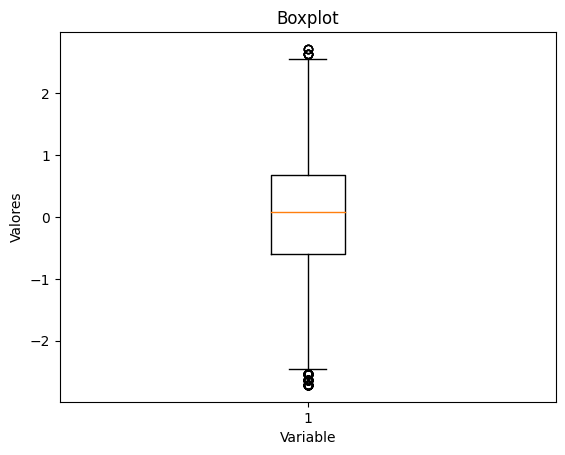

In [ ]:
# Crear el boxplot
plt.boxplot(train_features['depth'])

# Agregar etiquetas y título
plt.xlabel("Variable")
plt.ylabel("Valores")
plt.title("Boxplot")

# Mostrar el gráfico
plt.show()

In [ ]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(1024, activation="relu", input_shape=[len(train_features.keys())]),
    layers.Dense(512, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              10240     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 611,073
Trainable params: 611,073
Non-trai

In [ ]:
# Compile the model
model.compile(loss="mse", optimizer='adam', metrics=["mae", "mse"])

In [ ]:
# Train the model
history = model.fit(train_features, train_labels, epochs=500, validation_data=(test_features, test_labels))

Epoch 1/500
496/496 [==============================] - 3s 6ms/step - loss: 134468.0469 - mae: 264.4326 - mse: 134468.0469 - val_loss: 343705.6562 - val_mae: 408.5849 - val_mse: 343705.6562
Epoch 2/500
496/496 [==============================] - 2s 5ms/step - loss: 131925.6406 - mae: 262.8116 - mse: 131925.6406 - val_loss: 346217.2812 - val_mae: 408.0976 - val_mse: 346217.2812
Epoch 3/500
496/496 [==============================] - 2s 5ms/step - loss: 131113.0938 - mae: 261.2518 - mse: 131113.0938 - val_loss: 343563.8438 - val_mae: 407.0677 - val_mse: 343563.8438
Epoch 4/500
496/496 [==============================] - 2s 5ms/step - loss: 133078.2031 - mae: 264.7411 - mse: 133078.2031 - val_loss: 345997.1875 - val_mae: 404.9637 - val_mse: 345997.1875
Epoch 5/500
496/496 [==============================] - 2s 5ms/step - loss: 128812.6719 - mae: 258.5217 - mse: 128812.6719 - val_loss: 354618.9375 - val_mae: 418.3006 - val_mse: 354618.9375
Epoch 6/500
496/496 [==============================] - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_mae, test_mse = model.evaluate(test_features, test_labels)

In [ ]:
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
# Make predictions on new data
new_data = np.array([[0.23,61.5,55,3.95,3.98,2.43,2,1,3]])
new_data = (new_data - train_mean.values.reshape(1, -1)) / train_std.values.reshape(1, -1)
prediction = model.predict(new_data)
print("Predicción del precio:", prediction)

In [ ]:
predicciones = model.predict(test_features)
inicio = 50
fin=200
# Crear la gráfica de predicción por muestra
plt.figure(figsize=(10, 6))
a=plt.axes(aspect='equal')
plt.scatter(test_labels,predicciones)
plt.xlabel('Muestra')
plt.ylabel('Valor')
plt.title('Predicción por muestra del conjunto de pruebas')
_=plt.plot(test_labels,test_labels,color='orange')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(inicio,fin), test_labels[inicio:fin])
plt.plot(range(inicio,fin), predicciones[inicio:fin])
plt.xlabel('Muestra')
plt.ylabel('Valor')
plt.title('Valores de test_labels')
plt.show()

In [ ]:
test_labels

In [ ]:
predicciones

In [ ]:
# Plot each feature along with the predicted values
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(train_features.columns):
    axs[i].scatter(train_features[column], train_labels, s=2, color='black')
    #axs[i].scatter(test_features[column], test_labels, s=2, color='red')
    axs[i].scatter(train_features[column], model.predict(train_features), s=2, color='red')
    #axs[i].plot(test_features[column], model.predict(test_features), linewidth=1)